<a href="https://colab.research.google.com/github/shubham14yadav/Automotive-Safety-Data-Analysis/blob/main/Automotive_Safety_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching data for Toyota Camry
Visualizing data for Toyota Camry


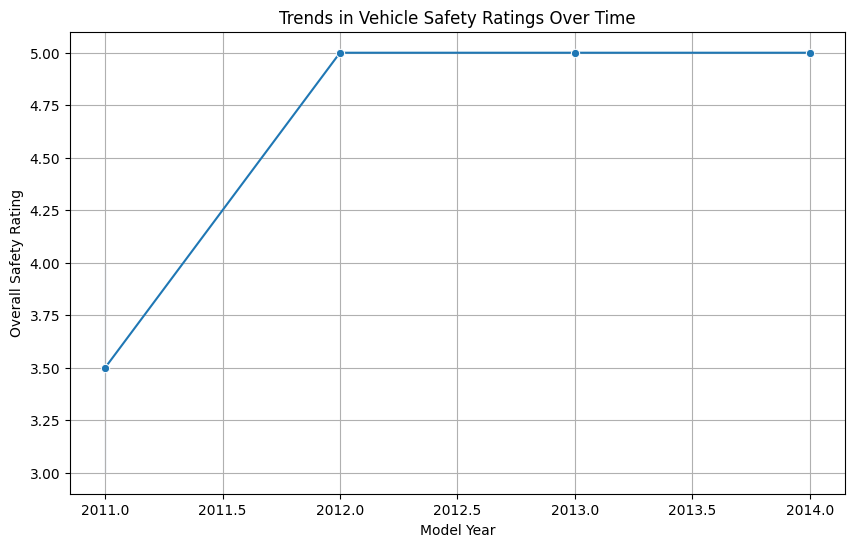

Fetching data for Honda Accord
Visualizing data for Honda Accord


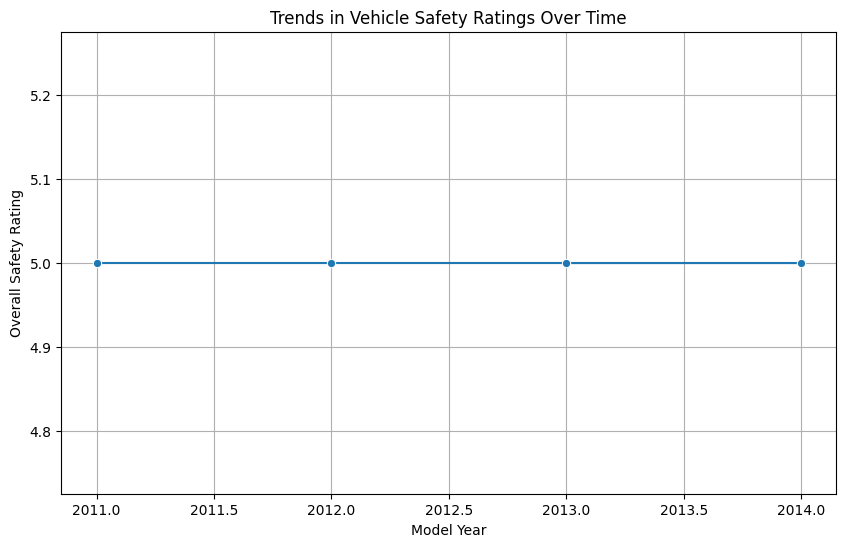

Fetching data for Ford Fusion
Visualizing data for Ford Fusion


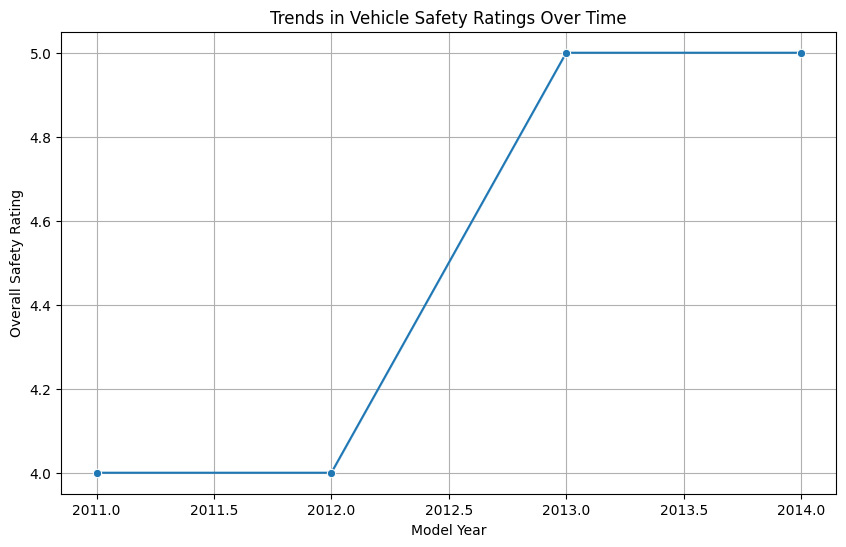

Fetching data for Chevrolet Malibu
Visualizing data for Chevrolet Malibu


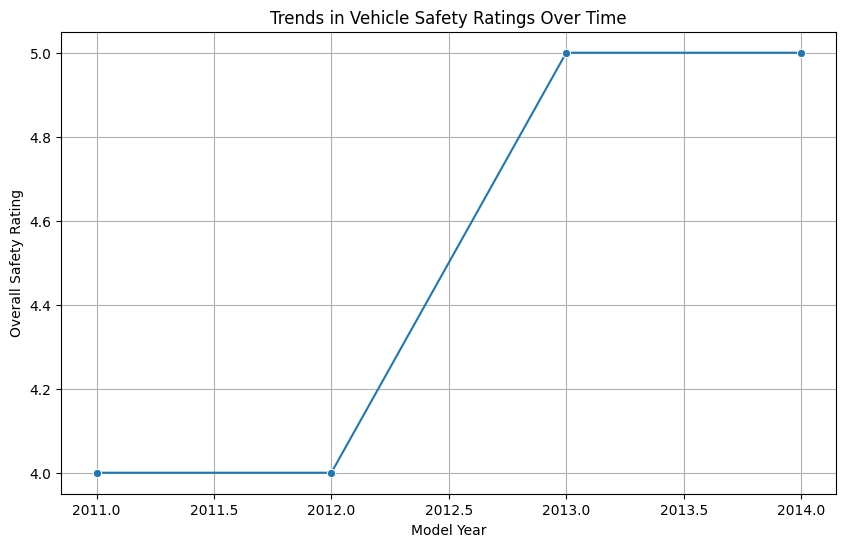

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def fetch_ncap_data(start_year, make, model):
    base_url = "https://api.nhtsa.gov/SafetyRatings"
    data_frames = []
    for year in range(start_year, start_year + 5):
        endpoint = f"{base_url}/modelyear/{year}/make/{make}/model/{model}"
        response = requests.get(endpoint)
        if response.status_code == 200:
            results = response.json().get('Results', [])
            if results:
                df = pd.DataFrame(results)
                data_frames.append(df)
            else:
                print(f"No results for {year}")
        else:
            print(f"Failed to retrieve data for {year}: {response.status_code}")

    return pd.concat(data_frames, ignore_index=True) if data_frames else pd.DataFrame()

def fetch_detailed_ratings(df):
    base_url = "https://api.nhtsa.gov/SafetyRatings"
    detailed_ratings = []
    for vehicle_id in df['VehicleId'].unique():
        detailed_endpoint = f"{base_url}/VehicleId/{vehicle_id}"
        detailed_response = requests.get(detailed_endpoint)
        if detailed_response.status_code == 200:
            detailed_result = detailed_response.json().get('Results', [])
            if detailed_result:
                detailed_df = pd.DataFrame(detailed_result)
                detailed_ratings.append(detailed_df)
            else:
                print(f"No detailed ratings found for VehicleId: {vehicle_id}")
        else:
            print(f"Failed to retrieve detailed ratings for VehicleId: {vehicle_id}: {detailed_response.status_code}")

    return pd.concat(detailed_ratings, ignore_index=True) if detailed_ratings else pd.DataFrame()

def preprocess_data(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df.dropna(subset=[column_name])

def visualize_safety_trends(df, rating_column):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='ModelYear', y=rating_column, marker='o')
    plt.title('Trends in Vehicle Safety Ratings Over Time')
    plt.xlabel('Model Year')
    plt.ylabel('Overall Safety Rating')
    plt.grid(True)
    plt.show()

def main():
    # List of vehicle makes and models to fetch data for
    vehicles = [
        ('Toyota', 'Camry'),
        ('Honda', 'Accord'),
        ('Ford', 'Fusion'),
        ('Chevrolet', 'Malibu')
    ]

    start_year = 2010  # Starting year for data collection

    # Loop through each make and model in the list
    for make, model in vehicles:
        print(f"Fetching data for {make} {model}")
        combined_df = fetch_ncap_data(start_year, make, model)

        if not combined_df.empty:
            detailed_ratings_df = fetch_detailed_ratings(combined_df)

            if not detailed_ratings_df.empty:
                detailed_ratings_df = preprocess_data(detailed_ratings_df, 'OverallRating')

                if not detailed_ratings_df.empty:
                    print(f"Visualizing data for {make} {model}")
                    visualize_safety_trends(detailed_ratings_df, 'OverallRating')
                else:
                    print(f"Data preprocessing resulted in an empty DataFrame for {make} {model}.")
            else:
                print(f"No detailed ratings available for {make} {model}.")
        else:
            print(f"No basic data available for {make} {model}.")

if __name__ == "__main__":
    main()



Fetching data for Toyota Camry
Fetching data for Honda Accord
Fetching data for Ford Fusion
Fetching data for Chevrolet Malibu


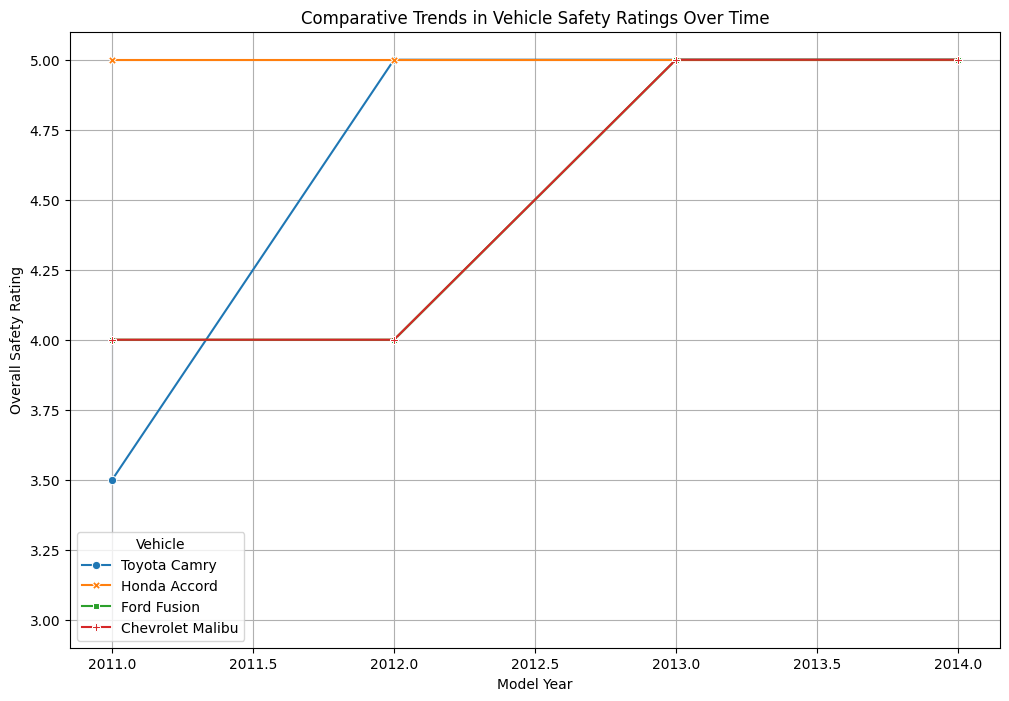

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_combined_safety_trends(all_data):
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=all_data, x='ModelYear', y='OverallRating', hue='Vehicle', style='Vehicle', markers=True, dashes=False)
    plt.title('Comparative Trends in Vehicle Safety Ratings Over Time')
    plt.xlabel('Model Year')
    plt.ylabel('Overall Safety Rating')
    plt.legend(title='Vehicle')
    plt.grid(True)
    plt.show()

def main():
    vehicles = [
        ('Toyota', 'Camry'),
        ('Honda', 'Accord'),
        ('Ford', 'Fusion'),
        ('Chevrolet', 'Malibu')
    ]
    start_year = 2010
    all_vehicles_data = []

    for make, model in vehicles:
        print(f"Fetching data for {make} {model}")
        combined_df = fetch_ncap_data(start_year, make, model)

        if not combined_df.empty:
            detailed_ratings_df = fetch_detailed_ratings(combined_df)

            if not detailed_ratings_df.empty:
                detailed_ratings_df = preprocess_data(detailed_ratings_df, 'OverallRating')

                if not detailed_ratings_df.empty:
                    # Add a column to identify the vehicle in the combined plot
                    detailed_ratings_df['Vehicle'] = f"{make} {model}"
                    all_vehicles_data.append(detailed_ratings_df)
                else:
                    print(f"Data preprocessing resulted in an empty DataFrame for {make} {model}.")
            else:
                print(f"No detailed ratings available for {make} {model}.")
        else:
            print(f"No basic data available for {make} {model}.")

    # Combine all data into a single DataFrame for visualization
    if all_vehicles_data:
        all_vehicles_data_df = pd.concat(all_vehicles_data, ignore_index=True)
        visualize_combined_safety_trends(all_vehicles_data_df)
    else:
        print("No data to visualize across all specified vehicles.")

if __name__ == "__main__":
    main()


In [15]:
import requests
import pandas as pd

# Base URL for the NHTSA API
base_url = "https://api.nhtsa.gov/SafetyRatings"

# Variables for the range of years, make, and model
data_frames = []
year = 2010
make = 'Toyota'
model = 'Camry'

# Loop through a range of years to get basic data
for yr in range(year, year + 5):  # Adjust the range as necessary
    endpoint = f"{base_url}/modelyear/{yr}/make/{make}/model/{model}"
    response = requests.get(endpoint)
    if response.status_code == 200:
        results = response.json().get('Results', [])
        if results:
            df = pd.DataFrame(results)
            data_frames.append(df)
        else:
            print(f"No results found for {yr}")
    else:
        print(f"Failed to retrieve data for {yr}: {response.status_code}")

# Combine all data frames into a single data frame
if data_frames:
    combined_df = pd.concat(data_frames, ignore_index=True)
else:
    combined_df = pd.DataFrame()

# Assuming we want detailed safety ratings for each vehicle variant fetched
detailed_ratings = []
for index, row in combined_df.iterrows():
    vehicle_id = row['VehicleId']
    detailed_endpoint = f"{base_url}/VehicleId/{vehicle_id}"
    detailed_response = requests.get(detailed_endpoint)
    if detailed_response.status_code == 200:
        detailed_result = detailed_response.json().get('Results', [])
        if detailed_result:
            detailed_df = pd.DataFrame(detailed_result)
            detailed_ratings.append(detailed_df)
        else:
            print(f"No detailed ratings found for VehicleId: {vehicle_id}")
    else:
        print(f"Failed to retrieve detailed ratings for VehicleId: {vehicle_id}: {detailed_response.status_code}")

# Combine all detailed ratings into a single DataFrame
if detailed_ratings:
    all_detailed_ratings_df = pd.concat(detailed_ratings, ignore_index=True)
else:
    all_detailed_ratings_df = pd.DataFrame()

# Example: print the combined detailed ratings DataFrame
all_detailed_ratings_df


,VehiclePicture,OverallRating,OverallFrontCrashRating,FrontCrashDriversideRating,FrontCrashPassengersideRating,FrontCrashPicture,FrontCrashVideo,OverallSideCrashRating,SideCrashDriversideRating,SideCrashPassengersideRating,...,ComplaintsCount,RecallsCount,InvestigationCount,ModelYear,Make,Model,VehicleDescription,VehicleId,SidePolePicture,SidePoleVideo
0,https://static.nhtsa.gov/images/vehicles/6125_...,Not Rated,Not Rated,5,5,https://static.nhtsa.gov/crashTest/images/2010...,https://static.nhtsa.gov/crashTest/videos/2010...,Not Rated,5,5,...,597,9,2,2010,TOYOTA,CAMRY,2010 Toyota Camry 4-DR. w/SAB,5461,NaN,NaN
1,https://static.nhtsa.gov/images/vehicles/7259_...,4,3,4,2,https://static.nhtsa.gov/crashTest/images/2011...,https://static.nhtsa.gov/crashTest/videos/2011...,4,5,4,...,591,5,2,2011,TOYOTA,CAMRY,2011 Toyota Camry 4 DR FWD Later Release,698,https://static.nhtsa.gov/crashTest/images/2011...,https://static.nhtsa.gov/crashTest/videos/2011...
2,https://static.nhtsa.gov/images/vehicles/7259_...,3,3,4,2,https://static.nhtsa.gov/crashTest/images/2011...,https://static.nhtsa.gov/crashTest/videos/2011...,3,5,2,...,591,5,2,2011,TOYOTA,CAMRY,2011 Toyota Camry 4 DR FWD Early Release,446,https://static.nhtsa.gov/crashTest/images/2011...,https://static.nhtsa.gov/crashTest/videos/2011...
3,https://static.nhtsa.gov/images/vehicles/7859_...,5,4,5,4,https://static.nhtsa.gov/crashTest/images/2012...,https://static.nhtsa.gov/crashTest/videos/2012...,5,5,5,...,615,2,3,2012,TOYOTA,CAMRY,2012 Toyota Camry 4 DR FWD,6270,https://static.nhtsa.gov/crashTest/images/2012...,https://static.nhtsa.gov/crashTest/videos/2012...
4,https://static.nhtsa.gov/images/vehicles/8770_...,5,4,5,4,https://static.nhtsa.gov/crashTest/images/2013...,https://static.nhtsa.gov/crashTest/videos/2013...,5,5,5,...,290,2,3,2013,TOYOTA,CAMRY,2013 Toyota Camry 4 DR FWD,7150,https://static.nhtsa.gov/crashTest/images/2013...,https://static.nhtsa.gov/crashTest/videos/2013...
5,https://static.nhtsa.gov/images/vehicles/9131_...,5,4,4,5,https://static.nhtsa.gov/crashTest/images/2014...,https://static.nhtsa.gov/crashTest/videos/2014...,5,5,5,...,0,0,0,2014,TOYOTA,CAMRY,2014 Toyota Camry 4 DR FWD Later Release,8794,https://static.nhtsa.gov/crashTest/images/2014...,https://static.nhtsa.gov/crashTest/videos/2014...
6,https://static.nhtsa.gov/images/vehicles/9131_...,5,4,5,4,https://static.nhtsa.gov/crashTest/images/2014...,https://static.nhtsa.gov/crashTest/videos/2014...,5,5,5,...,440,3,2,2014,TOYOTA,CAMRY,2014 Toyota Camry 4 DR FWD Early Release,8577,https://static.nhtsa.gov/crashTest/images/2014...,https://static.nhtsa.gov/crashTest/videos/2014...


In [16]:
all_detailed_ratings_df.to_csv('detailed_ratings.csv', index=False)

In [17]:
all_detailed_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   VehiclePicture                          7 non-null      object 
 1   OverallRating                           7 non-null      object 
 2   OverallFrontCrashRating                 7 non-null      object 
 3   FrontCrashDriversideRating              7 non-null      object 
 4   FrontCrashPassengersideRating           7 non-null      object 
 5   FrontCrashPicture                       7 non-null      object 
 6   FrontCrashVideo                         7 non-null      object 
 7   OverallSideCrashRating                  7 non-null      object 
 8   SideCrashDriversideRating               7 non-null      object 
 9   SideCrashPassengersideRating            7 non-null      object 
 10  SideCrashPicture                        7 non-null      object 
 1

In [21]:
# Assuming there are columns like 'OverallRating' and 'VehicleDescription'
# Group by 'VehicleDescription' and calculate average safety ratings
# Convert 'OverallRating' to numeric, handling non-numeric values
all_detailed_ratings_df['OverallRating'] = pd.to_numeric(all_detailed_ratings_df['OverallRating'], errors='coerce')
average_ratings = all_detailed_ratings_df.groupby('VehicleDescription')['OverallRating'].mean().sort_values(ascending=False)

# Display the sorted average ratings to identify the top-rated vehicle variants
print(average_ratings)

VehicleDescription
2012 Toyota Camry 4 DR FWD                  5.0
2013 Toyota Camry 4 DR FWD                  5.0
2014 Toyota Camry 4 DR FWD Early Release    5.0
2014 Toyota Camry 4 DR FWD Later Release    5.0
2011 Toyota Camry 4 DR FWD Later Release    4.0
2011 Toyota Camry 4 DR FWD Early Release    3.0
2010 Toyota Camry 4-DR. w/SAB               NaN
Name: OverallRating, dtype: float64


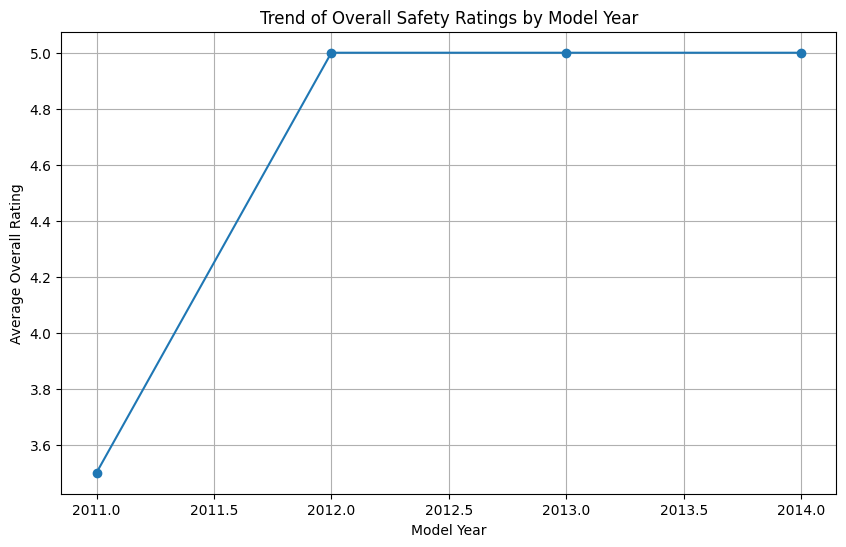

In [22]:
#Monitor Vehicle Safety Trends
import matplotlib.pyplot as plt

# Assuming there is a 'ModelYear' column
# Group by 'ModelYear' and calculate average overall ratings
yearly_trends = all_detailed_ratings_df.groupby('ModelYear')['OverallRating'].mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
yearly_trends.plot(kind='line', marker='o')
plt.title('Trend of Overall Safety Ratings by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Overall Rating')
plt.grid(True)
plt.show()


In [25]:
# Assuming there are columns like 'ComplaintsCount', 'RecallsCount', 'InvestigationCount'
# Calculate a risk score by combining these factors with ratings
data=all_detailed_ratings_df.copy()
data['RiskScore'] = (data['ComplaintsCount'] + data['RecallsCount'] + data['InvestigationCount']) / data['OverallRating']

# Display vehicles with the highest risk scores
high_risk_vehicles = data.sort_values(by='RiskScore', ascending=False)
print(high_risk_vehicles[['VehicleDescription', 'RiskScore']])


                         VehicleDescription   RiskScore
2  2011 Toyota Camry 4 DR FWD Early Release  199.333333
1  2011 Toyota Camry 4 DR FWD Later Release  149.500000
3                2012 Toyota Camry 4 DR FWD  124.000000
6  2014 Toyota Camry 4 DR FWD Early Release   89.000000
4                2013 Toyota Camry 4 DR FWD   59.000000
5  2014 Toyota Camry 4 DR FWD Later Release    0.000000
0             2010 Toyota Camry 4-DR. w/SAB         NaN
